Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

Loading datasets

In [2]:
df=pd.read_csv('American Express.csv')

In [3]:
df

,Applicant_ID,Full_Name,Age,Gender,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Property_Type,...,Home_Ownership,Loan_Type,Employment_Sector,Co_Applicant,Residency_Status,Loan_Purpose_Type,Bank_Relationship_Years,Employment_Stability_Years,Savings_Balance,Loan_Status
0,575791,Jane Anderson,47,Other,Unemployed,78327,745,38670,12,Apartment,...,Rent,Refinance,Technology,No,Permanent Resident,Small Business Loan,13,8,43213,Rejected
1,320626,Charlie Jones,32,Female,Retired,45184,548,17617,48,Apartment,...,Mortgage,Refinance,Retail,No,Work Visa,Education Loan,11,6,42313,Rejected
2,883605,Casey Williams,26,Male,Self-Employed,92716,669,7596,12,Single Family,...,Rent,First Loan,Government,Yes,Permanent Resident,Small Business Loan,8,5,34884,Rejected
3,335817,Chris Anderson,49,Other,Self-Employed,35617,530,17950,48,Single Family,...,Other,First Loan,Other,Yes,Student Visa,Personal Loan,17,2,8299,Rejected
4,262628,Jordan Johnson,31,Male,Employed,42156,619,13345,36,Townhouse,...,Rent,First Loan,Healthcare,No,Work Visa,Mortgage,14,6,15532,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,525536,Charlie Jones,49,Male,Unemployed,30579,627,37702,36,Single Family,...,Other,First Loan,Retail,Yes,Work Visa,Small Business Loan,10,10,4465,Rejected
49996,227906,Casey Anderson,22,Male,Employed,74048,706,49057,12,Townhouse,...,Mortgage,First Loan,Manufacturing,Yes,Student Visa,Education Loan,2,8,45958,Rejected
49997,179381,Casey Jones,53,Female,Self-Employed,34053,559,45120,48,Single Family,...,Own,Refinance,Manufacturing,No,Student Visa,Personal Loan,3,10,43391,Rejected
49998,557130,Taylor Smith,53,Female,Retired,76041,834,33379,60,Single Family,...,Rent,First Loan,Retail,No,Citizen,Auto Loan,12,10,25638,Rejected


Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                50000 non-null  int64  
 1   Full_Name                   50000 non-null  object 
 2   Age                         50000 non-null  int64  
 3   Gender                      50000 non-null  object 
 4   Employment_Status           50000 non-null  object 
 5   Annual_Income               50000 non-null  int64  
 6   Credit_Score                50000 non-null  int64  
 7   Loan_Amount                 50000 non-null  int64  
 8   Loan_Term                   50000 non-null  int64  
 9   Property_Type               50000 non-null  object 
 10  Marital_Status              50000 non-null  object 
 11  Dependents                  50000 non-null  int64  
 12  Debt_to_Income_Ratio        50000 non-null  float64
 13  Existing_Loans              500

In [5]:
df.drop(columns=["Applicant_ID", "Full_Name"], inplace=True)

In [6]:
import pandas as pd

def show_categorical_counts(df):
    """Displays the value counts for all categorical columns in the DataFrame."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        print(f"\nValue Counts for '{col}':")
        print(df[col].value_counts())
        print("-" * 40)  # Separator for better readability

show_categorical_counts(df)


Value Counts for 'Gender':
Gender
Other     16755
Female    16697
Male      16548
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Employment_Status':
Employment_Status
Retired          10100
Self-Employed    10048
Student          10041
Employed          9954
Unemployed        9857
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Property_Type':
Property_Type
Multi-Family     10079
Townhouse        10069
Apartment        10061
Single Family     9960
Condo             9831
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Marital_Status':
Marital_Status
Single      12671
Widowed     12540
Married     12417
Divorced    12372
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Home_Ownership':
Home_Ownership
Other       12607
Own         12536
Rent        12431
Mortgage    12426
Name: count, dtype: int64
----------------------------------------


In [7]:
#Encoding features

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_Status":  # Exclude target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df["Loan_Status"] = target_encoder.fit_transform(df["Loan_Status"])
target_names = target_encoder.classes_.astype(str)  # Convert class labels to strings


Exploratory Data Analysis (EDA)

In [8]:
# Set Seaborn style
sns.set_style("whitegrid")

# Detect categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

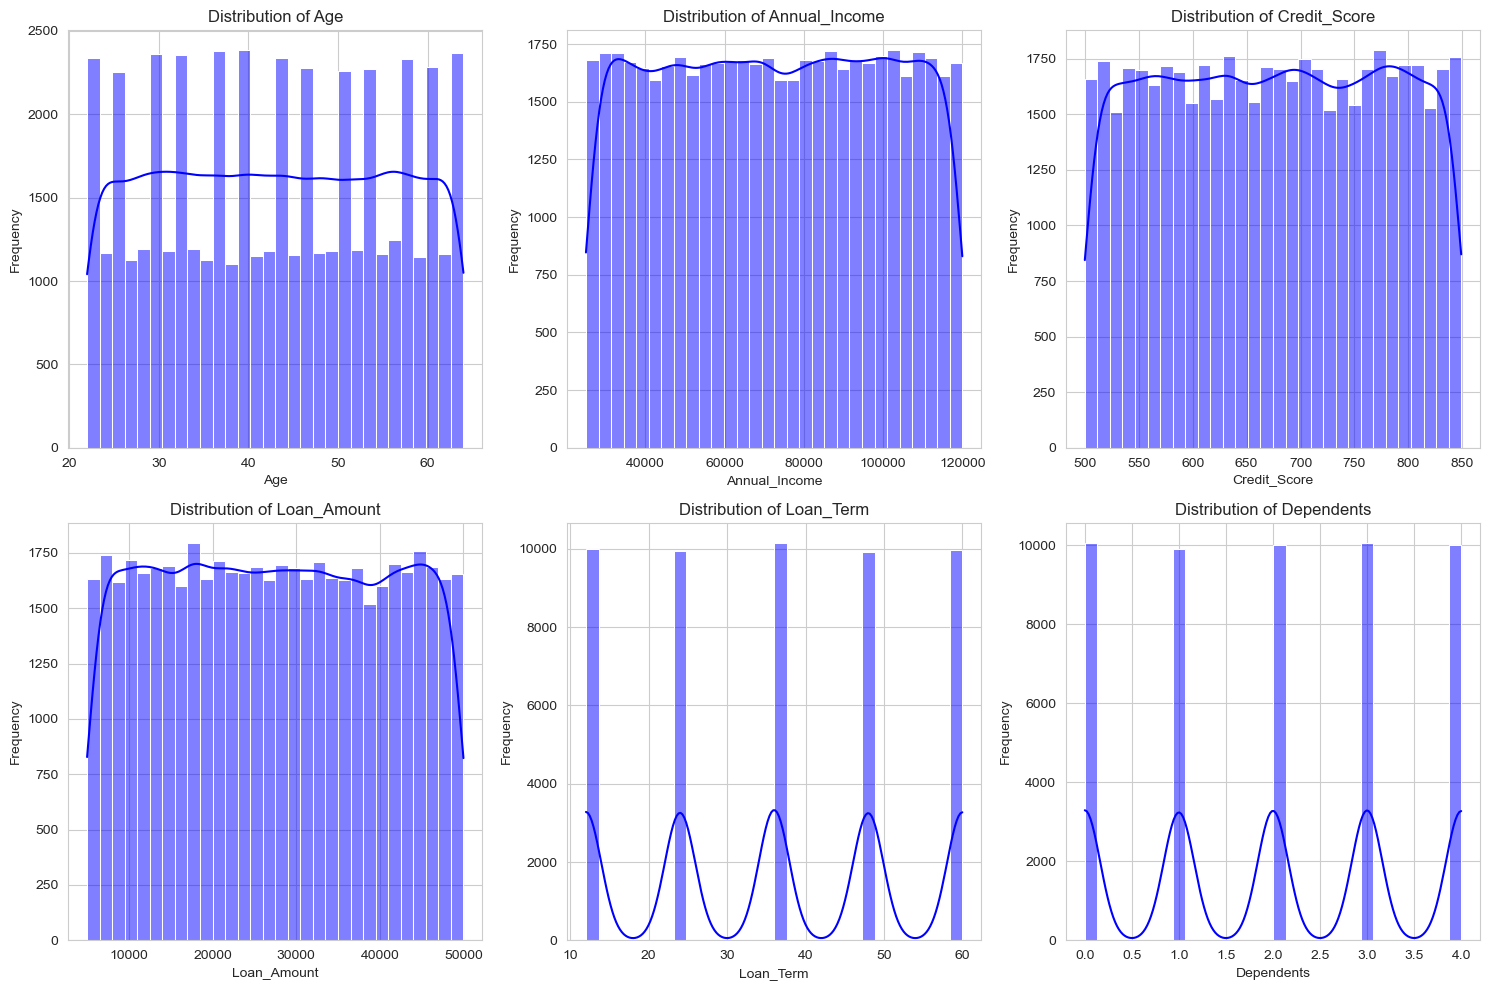

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
#Inference: Most features have uniform distributions, which align well with Naïve Bayes’ assumption of independent features, while Loan Term and Dependents have categorical-like distributions, reinforcing the suitability of a probabilistic model.

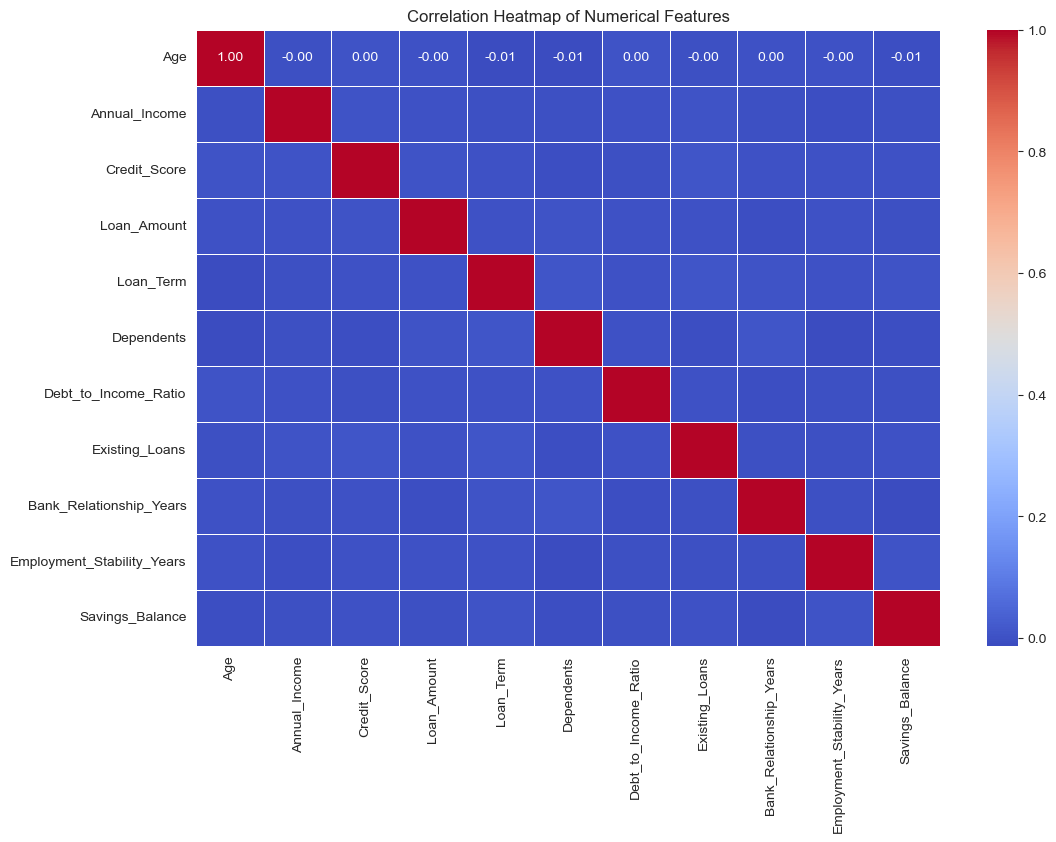

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [12]:
#Inference: The absence of strong correlations confirms feature independence, which is ideal for Naïve Bayes since it assumes that features contribute independently to classification.

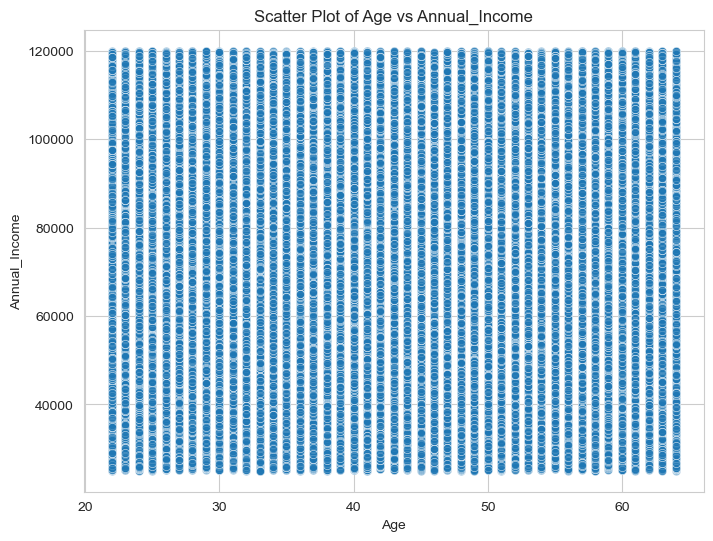

In [13]:
#Scatter Plot: Age V/S Annual Income

if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], alpha=0.7)
    plt.title(f"Scatter Plot of {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

In [14]:
#Inference: The uniform spread without clear clusters suggests that feature interactions are weak, making Naïve Bayes a viable choice since it does not rely on complex feature dependencies.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

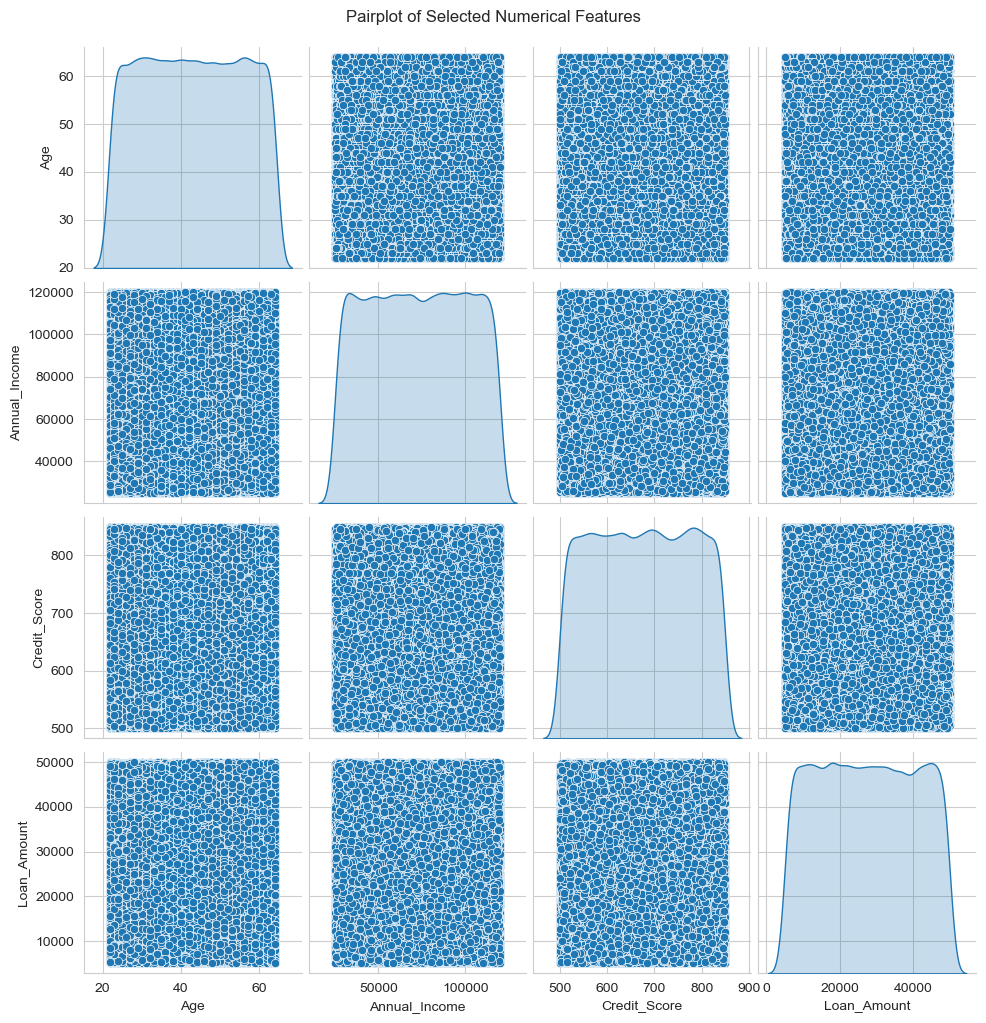

In [15]:
#Pair Plots

if len(numerical_columns) > 1:
    sample_cols = numerical_columns[:4]  # Select up to 4 numerical columns to avoid issues
    sns.pairplot(df[sample_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
    plt.show()

In [16]:
#Inference: No strong separation between classes is observed, reinforcing the need for a probabilistic model like Naïve Bayes rather than a decision-tree-based model.

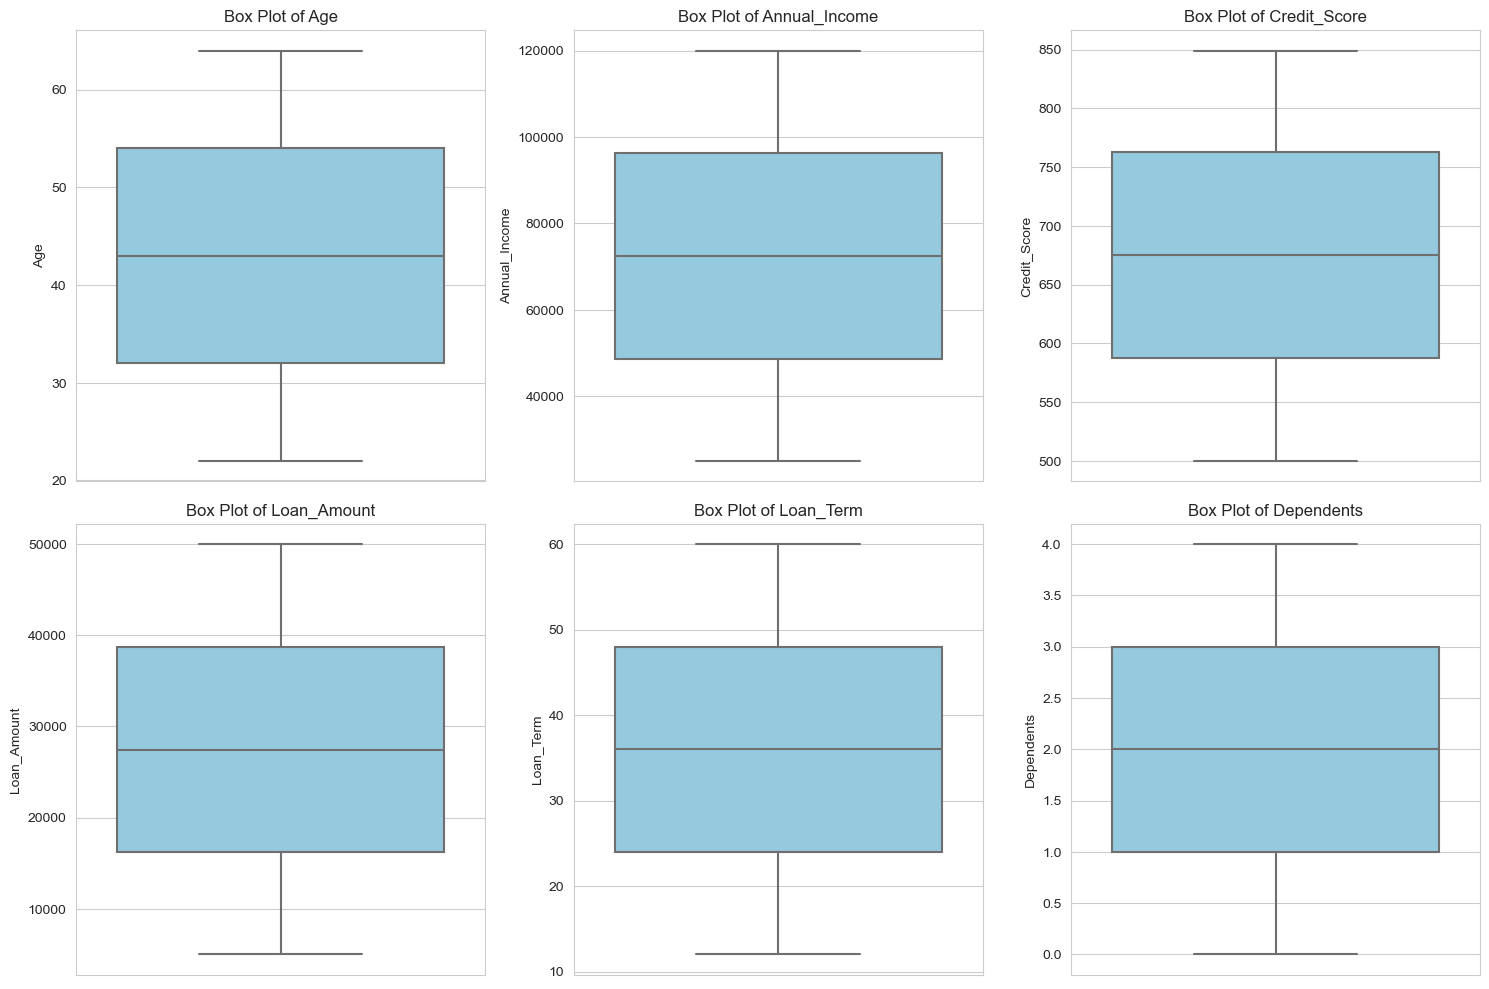

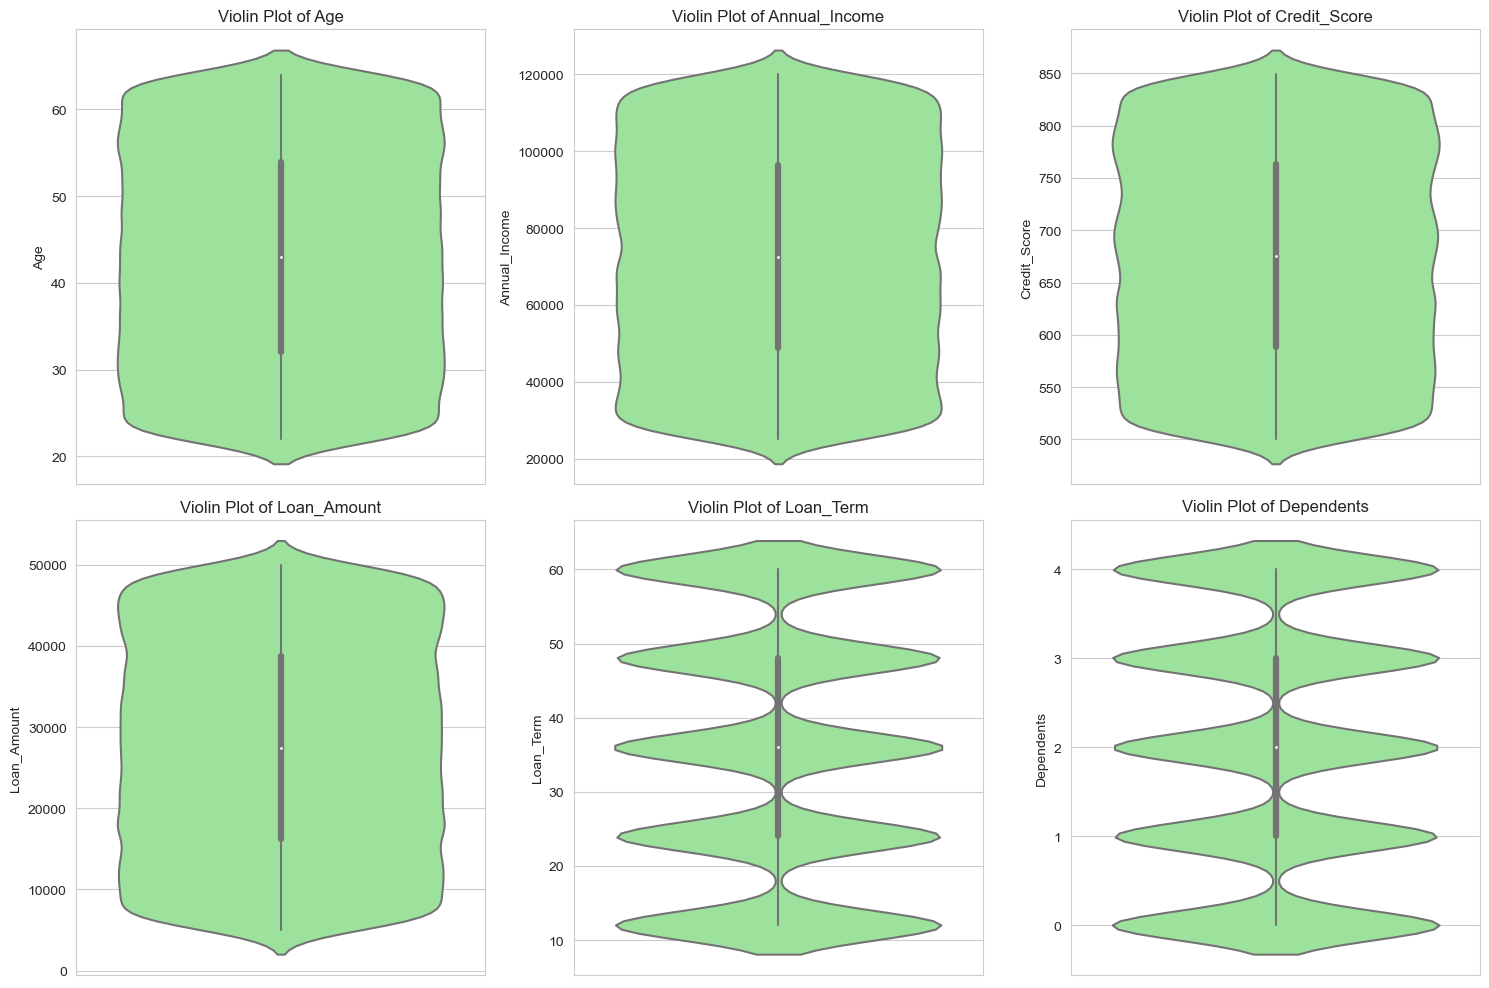

In [17]:
# Box and Whisker Plot (Outlier Detection)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Violin Plot (Distribution and Density)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df[col], color='lightgreen')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [18]:
#Inference:Features show a normal-like spread with some variance, helping Naïve Bayes classify efficiently using probability distributions while maintaining class separability.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

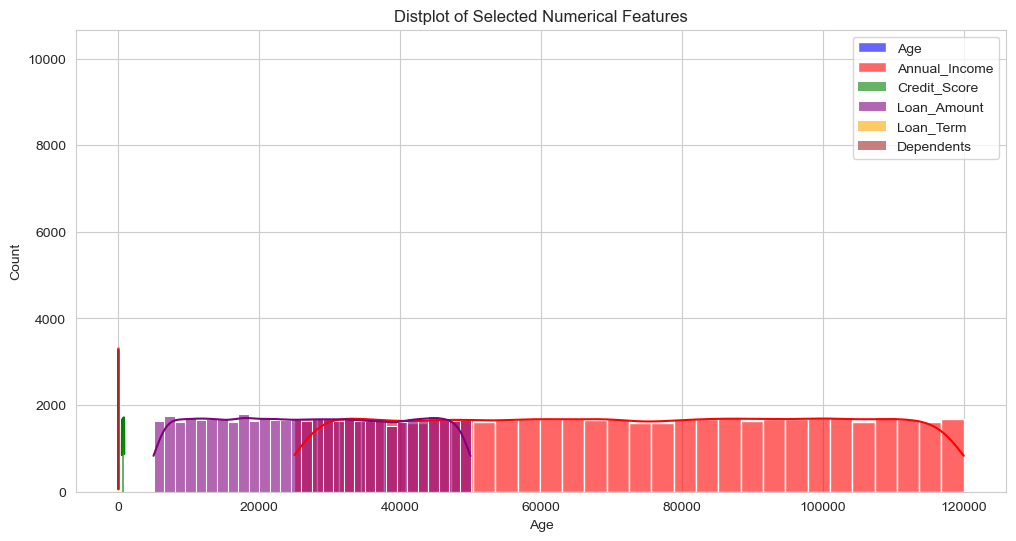

In [19]:
# Distplot (Feature Distribution) with one color per feature
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Define distinct colors

for i, col in enumerate(numerical_columns[:6]):
    sns.histplot(df[col], kde=True, bins=30, alpha=0.6, label=col, color=colors[i])

plt.title("Distplot of Selected Numerical Features")
plt.legend()
plt.show()

In [20]:
#Inference: The variation in feature spread ensures that Naïve Bayes can leverage probability-based classification effectively without requiring fine-tuned feature engineering.

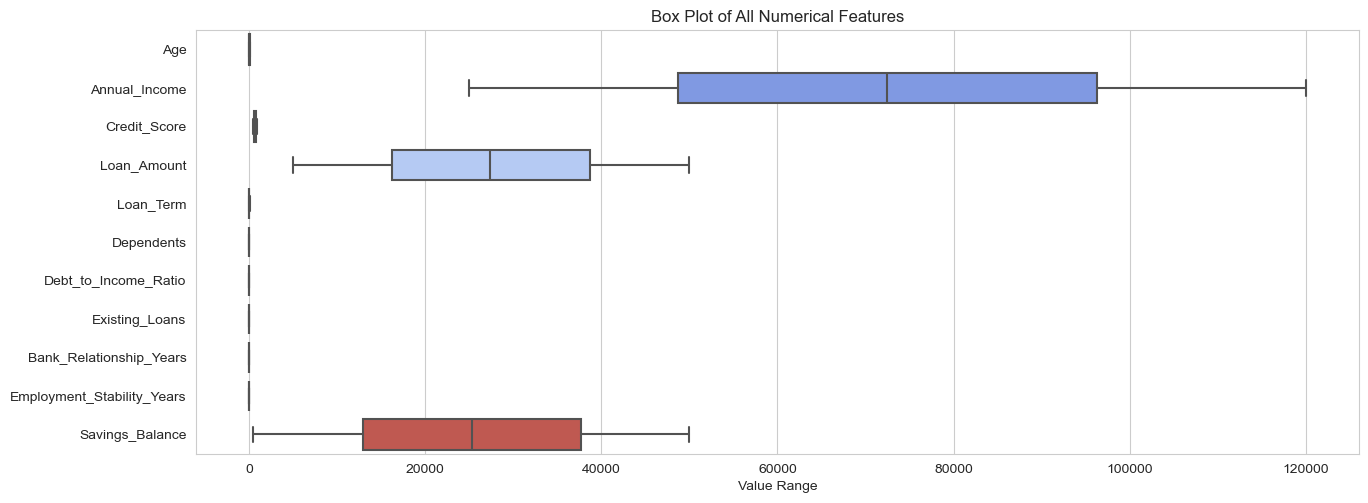

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

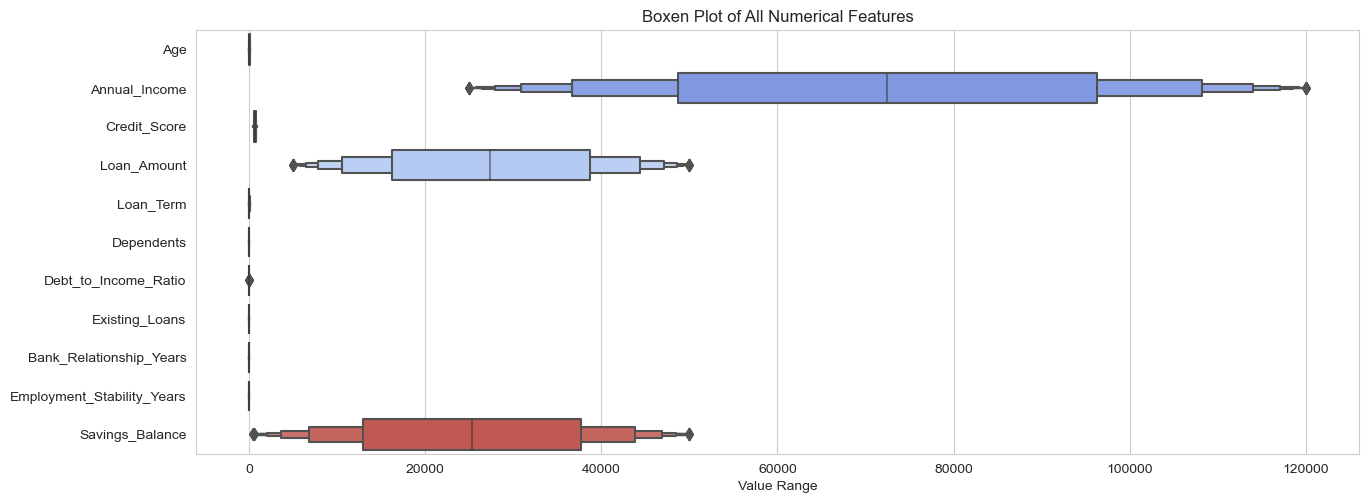

In [21]:
# --------------------------- #
# Outlier Detection
# --------------------------- #
plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Box Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxenplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Boxen Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

In [22]:
#Inference: Minimal outliers and a well-distributed range indicate that Naïve Bayes can generalize well without being overly sensitive to extreme values.

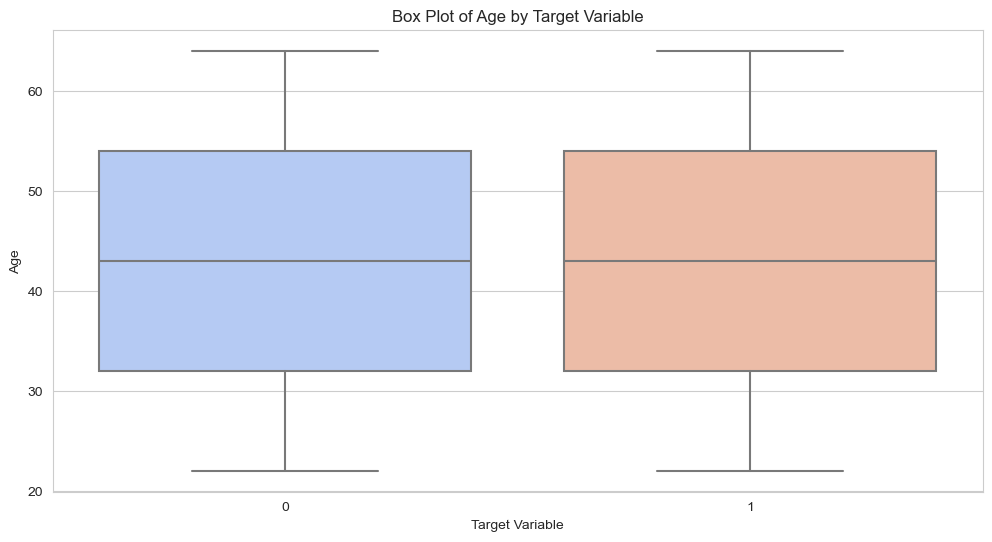

In [23]:

# --------------------------- #
#  Categorical vs Numerical: Boxplot for Feature-Target Relationship
# --------------------------- #
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Loan_Status'], y=df[numerical_columns[0]], palette="coolwarm")
plt.title(f'Box Plot of {numerical_columns[0]} by Target Variable')
plt.xlabel("Target Variable")
plt.ylabel(numerical_columns[0])
plt.show()

In [24]:
#Inference: Similar age distributions across classes indicate that Age may not be a key distinguishing factor, requiring reliance on other features for classification.

Model Training and Testing

In [25]:
# Split dataset into features and target variable
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [26]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Evaluvation and Analysis

In [28]:
#Train and evaluate model

# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Dictionary to store results
results = {}

print("Training Naïve Bayes...")
nb_model.fit(X_train, y_train)  # Train only Naïve Bayes
y_pred = nb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Store results
results["Naïve Bayes"] = {
    "Accuracy": accuracy,
    "Classification Report": classification_rep
}

# Display results
print(f"\nModel: Naïve Bayes")
print(f"Accuracy: {results['Naïve Bayes']['Accuracy']:.4f}")
print("Classification Report:\n", results["Naïve Bayes"]["Classification Report"])

Training Naïve Bayes...

Model: Naïve Bayes
Accuracy: 0.9189
Classification Report:
               precision    recall  f1-score   support

    Approved       0.91      0.71      0.80      2224
    Rejected       0.92      0.98      0.95      7776

    accuracy                           0.92     10000
   macro avg       0.91      0.84      0.87     10000
weighted avg       0.92      0.92      0.92     10000



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

# Load dataset (replace with actual dataset)
# X, y = load_your_data()  # Replace this with actual data loading

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance (compute scale_pos_weight)
approved_count = np.sum(y_train == 1)  # Assuming 1 = "Approved"
rejected_count = np.sum(y_train == 0)  # Assuming 0 = "Rejected"
scale_pos_weight = rejected_count / approved_count  # Balance ratio

# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability for "Approved" class

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Rejected", "Approved"])

# Print results
print("\nModel: XGBoost")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Training XGBoost model...


C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:13:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00      2224
    Approved       1.00      1.00      1.00      7776

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [25]:
#XGBoost performs well, but this can be a result of overfitting.

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring="accuracy")

print(f"Cross-Validation Accuracy Scores: {xgb_cv_scores}")
print(f"Mean CV Accuracy: {xgb_cv_scores.mean():.4f}")

C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:14:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\

Cross-Validation Accuracy Scores: [0.999625 0.99875  0.9985   0.9995   0.9985  ]
Mean CV Accuracy: 0.9990


In [ ]:
#The cross-validation test proved that the model can be generalized since the test accuracy is almost equal to validation accuracy.

In [ ]:
#Even though, Naive Bayes performs well, XGBoost performs stronger and can be generalized.

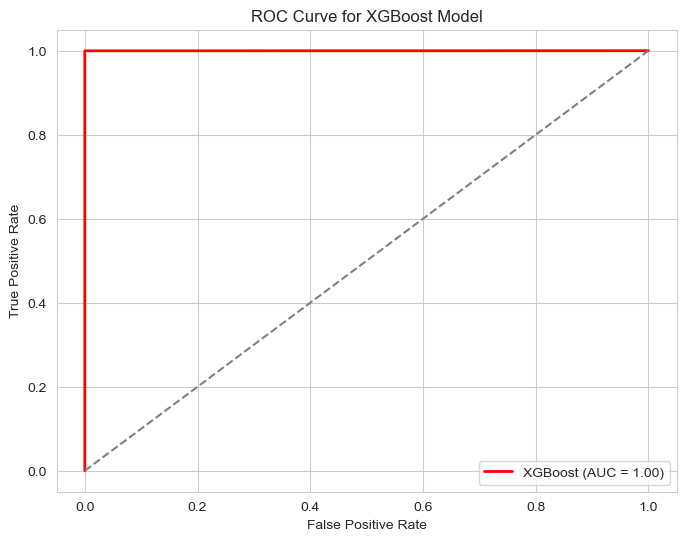

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Approved) using XGBoost
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color="red", lw=2, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.show()

Conclusion

In [ ]:
#XGBoost performs and generalizes well.